<a href="https://colab.research.google.com/github/fabnancyuhp/DEEP-LEARNING/blob/main/NOTEBOOKS/convolutional_neural_network_exercice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example : CNN on CIFAR10 dataset

The CIFAR10 dataset is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories. The 10 categories are 'airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'<br>
In this example, we build a Convolutional neural network that will recognize images from the CIFAR10 dataset.

## Srep 1 : Download the CIFAR10 Dataset
In the cell below, we load the CIFAR-10 data set. We create a dictionary of the labels and their descriptions.

In [ ]:
class_names = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## Step 2: displaying images from the training dataset
* we first display a single image
* secondly, we display an image of all possible labels.

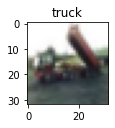

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(1.5,1.5))
plt.title(class_names[y_train[2][0]])
plt.imshow(x_train[2])
plt.show()

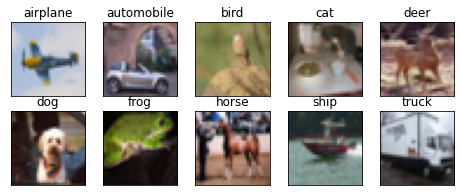

In [ ]:
import numpy as np

class_names = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

fig = plt.figure(figsize=(8,3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = x_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num,::]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

## Data preprocessing
In the CIFAR10 dataset 32x32 pixels are used to modelized each image. The pixel values are in the range of 0 to 255 for each of the red, green, and blue channels. It’s good practice to work with normalized data. We standardize the pixel values to the [0, 1] range by devising each pixel value by 255.

In [ ]:
x_train_scale = x_train / 255
x_test_scale = x_test / 255

The output of the model can comprise any of the 10 distinct image categories. so, we need 10 classes in output. To make output for 10 classes, use tensorflow.keras.utils.to_categorical function, which will provide the 10 columns. Out of these 10 columns, only one value will be one and the rest 9 will be zero and this one value of the output will denote the class of the image.

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

## Build the CNN model
he convolutional neural network will be a stack of altered Conv2D and MaxPooling2d layers. Then a feedforward neural network will be added on top. In other words, we add Fully connected layers on top. We explain the working of each layer in the CNN model:
* layer1 is the Conv2d layer which convolves the image using 32 filters each of size (3*3). 
* layer2 is the MaxPooling2D layer which picks the max value out of a matrix of size (2*2). 
* layer3 is the Conv2d layer which convolves the image using 64 filters each of size (3*3).
* layer4 is the MaxPooling2D layer which picks the max value out of a matrix of size (2*2). 
* layer5 is the Conv2d layer which convolves the image using 128 filters each of size (3*3).
* layer6 is the MaxPooling2D layer which picks the max value out of a matrix of size (2*2).
* layer7 is the Conv2d layer which convolves the image using 256 filters each of size (3*3).
* layer8 is the MaxPooling2D layer which picks the max value out of a matrix of size (2*2).
* layer9 is flattening the output obtained from layer8 and this flattens output is passed to layer10. 
* layer10 is a hidden layer of a neural network containing 128 neurons.
* layer11 is a hidden layer of a neural network containing 64 neurons.
* layer12 is the output layer having 10 neurons for 10 classes of output that is using the softmax function.

In [ ]:
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dropout,Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=x_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
#model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
#model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [ ]:
model.summary()

## Compile and Train the Model
We can now compile the model using the "categorical_crossentropy" loss function and the adam algorithm for the optimizer.<br>
Then we can fit this model with 45 epochs. The model doesn't know the batch size since we didn't specify it, so it is set to None. When the training will start, if the batch size is unspecified, the fit method will set it to 32. The training set contains about $50000\times0.9=45000$ images. The validation set contains $50000*0.1=5000$. We have 50,000 images that will be fed to the network by batches of 32 images. Then, it will take $45000/32\approx 1406.25$ steps to see all the images per epoch.

In [ ]:
#compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#TRAIN_HIST = model.fit(x_train_scale,y_train_cat,batch_size=32,epochs=100)
TRAIN_HIST = model.fit(x_train_scale,y_train_cat,epochs=35,validation_split=0.1)

Epoch 1/35
1407/1407 [==============================] - 20s 14ms/step - loss: 1.4347 - accuracy: 0.4767 - val_loss: 1.1431 - val_accuracy: 0.5986
Epoch 2/35
1407/1407 [==============================] - 19s 14ms/step - loss: 0.9801 - accuracy: 0.6534 - val_loss: 0.8748 - val_accuracy: 0.6976
Epoch 3/35
1407/1407 [==============================] - 19s 13ms/step - loss: 0.7959 - accuracy: 0.7204 - val_loss: 0.7953 - val_accuracy: 0.7292
Epoch 4/35
1407/1407 [==============================] - 19s 14ms/step - loss: 0.6603 - accuracy: 0.7678 - val_loss: 0.7818 - val_accuracy: 0.7286
Epoch 5/35
1407/1407 [==============================] - 19s 13ms/step - loss: 0.5536 - accuracy: 0.8061 - val_loss: 0.7442 - val_accuracy: 0.7492
Epoch 6/35
1407/1407 [==============================] - 19s 13ms/step - loss: 0.4610 - accuracy: 0.8368 - val_loss: 0.7551 - val_accuracy: 0.7568
Epoch 7/35
1407/1407 [==============================] - 19s 13ms/step - loss: 0.3784 - accuracy: 0.8671 - val_loss: 0.7938 -

## Display the Model Training History:<br>

* summarize history for accuracy
* summarize history for loss

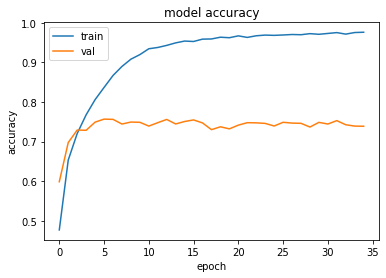

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(TRAIN_HIST.history['accuracy'])
plt.plot(TRAIN_HIST.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

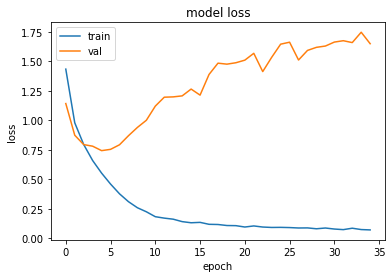

In [ ]:
# summarize history for loss
plt.plot(TRAIN_HIST.history['loss'])
plt.plot(TRAIN_HIST.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Evaluate the model and use the model on a picked image over the test set
We evaluate the model:

In [ ]:
model.evaluate(x_test_scale,y_test_cat)

313/313 [==============================] - 2s 7ms/step - loss: 1.8171 - accuracy: 0.7258


[1.8171007633209229, 0.7257999777793884]

We randomly choose an image from the test to use the model on it:

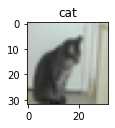

In [ ]:
import numpy as np
np.random.seed(1998)
index = np.random.randint(x_test.shape[0])
image_to_test = x_test[index,::]
label_image_to_test = y_test[index]

import matplotlib.pyplot as plt
plt.figure(figsize=(1.5,1.5))
plt.title(class_names[label_image_to_test[0]])
plt.imshow(image_to_test)
plt.show()

* Before to pass the image to the CNN, we have to reshape it
* Then model creates a probability vector
* We take the indice of the maximum value using np.argmax 

In [ ]:
pred_proba = model.predict(image_to_test.reshape(1,32,32,3)/255)

pred_class = np.argmax(pred_proba)
pred_class_label = class_names[pred_class]
pred_class_label

'cat'

# Exercice: Flower species classification
In this exercise, you will build a CNN to classify flower images. The model should predict the species of the flower. The first step is to load and describe the flowers dataset. Run the cell below to load the dataset.

In [1]:
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds
ds, info = tfds.load('tf_flowers',as_supervised=True,with_info=True)
train_set = ds['train']
image_tot = [tf.image.resize(im,(180, 180)).numpy().astype("uint8") for im,lab in train_set.take(3670)]
y_tot = [label.numpy() for image,label in train_set.take(3670)]
import numpy as np
X_image = np.concatenate(image_tot).reshape(3670,180,180,3)
class_names = info.features['label'].names
y_tot = np.array([class_names[label] for image,label in train_set.take(3670)])

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]


Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


When we use google colab, we can be in trouble with the RAM. Then we should release some memory deleting ds, train_set....


When we use google colab, we can be in trouble with the RAM. Then we should release some memory deleting ds, train_set. We have to notice, we release some memory with the garbage collector python package.

In [2]:
import gc
del ds
del info
del class_names
del train_set
gc.collect()

232

In this exercise you work with X_image, a NumPy array of shapes (3670,128,128,3) representing 3670 distinct flower images. y_tot is a numpy array that store the species. 

We display the numbered image 1000 and print its species:

the species is:daisy


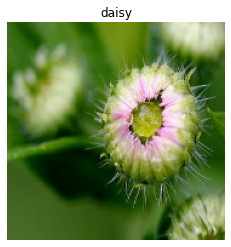

In [3]:
import matplotlib.pyplot as plt

#we select the image numbered 1000
x_selected = X_image[1000]
plt.imshow(x_selected)
plt.title(str(y_tot[1000]))
plt.axis("off")

print("the species is:" +str(y_tot[1000]))

We display 9 images from the flowers dataset.

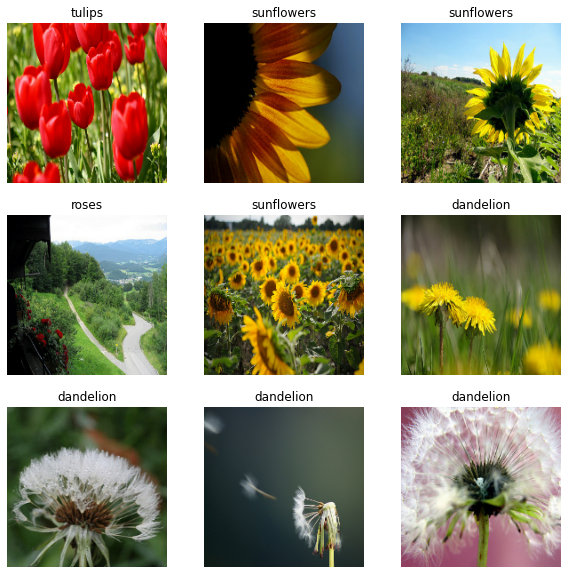

In [4]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 10))
i = 0
for image in X_image[0:9]:
    plt.subplot(3, 3, i + 1)
    #image = tf.image.resize(image, (180, 180))
    plt.imshow(image)
    plt.title(y_tot[i])
    plt.axis("off")
    i += 1

1/How many unique classes are there in the flowers dataset? What are the different species encountered in the flowers dataset?

In [9]:
#your code here
import numpy as np
print("the species are: "+ str(np.unique(y_tot)))
print("number of classes: "+str(len(np.unique(y_tot))))

the species are: ['daisy' 'dandelion' 'roses' 'sunflowers' 'tulips']
number of classes: 5


2/ Encode the species names. You can use the dictionary below. Store the result into a NumPy array called y_encode.

In [10]:
#your code here
species_to_code = {'daisy':0,'dandelion':1,'roses':2,'sunflowers':3,'tulips':4}
y_encoded = np.array([species_to_code[m] for m in y_tot])

3/ The model we build should detect any flower species. Since you have. So, we need several classes in the output. To make output for the necessary classes, use to_categorical function. Store the result in y_cat.

In [11]:
from tensorflow.keras.utils import to_categorical
y_cat = to_categorical(y_encoded,num_classes=5)
y_cat

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

4/ Display an image randomly choised for each species.

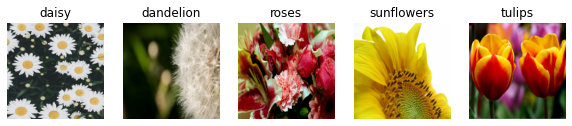

In [35]:
import matplotlib.pyplot as plt
import numpy as np

i= 0
plt.figure(figsize=(10, 10))
for specie in np.unique(y_tot):
  plt.subplot(1,5,i+1)
  ens = np.random.choice(np.where(y_tot==specie)[0],size=1,replace=False)
  image = X_image[ens][0]
  plt.imshow(image)
  plt.title(y_tot[ens][0])
  plt.axis("off")
  i +=1

5/ Here, we create a data augmentation stage. data_augmentation applies rotation, zomm and flip on an image to create a new one.

In [36]:
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomZoom, RandomRotation
from tensorflow.keras.models import Sequential

data_augmentation = Sequential([RandomFlip("horizontal"),RandomRotation(0.1),RandomZoom(0.1)])

Now, we have an original image:

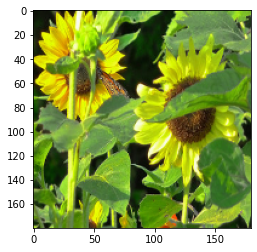

In [37]:
import matplotlib.pyplot as plt
plt.imshow(X_image[100])

The new image created by  data_augmentation:

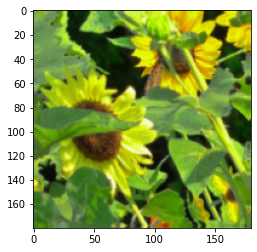

In [38]:
import matplotlib.pyplot as plt
new_image = data_augmentation(X_image[100]).numpy()
plt.imshow(new_image)

Use data_augmentation to create 500 extra images of each species. You also have to create the label values. You should store the new images in a numpy array called X_image_augmented with a (2500, 180, 180, 3) shape. You should store the label in a numpy array called y_label_augmented.

In [62]:
import matplotlib.pyplot as plt
import numpy as np

X_image_augmented = np.concatenate([data_augmentation(X_image[np.random.choice(np.where(y_tot==specie)[0],size=500,replace=False) ]).numpy() for specie in np.unique(y_tot)],0)
y_label_augmented = np.concatenate([np.array([specie]*500) for specie in np.unique(y_tot)])

array(['daisy', 'daisy', 'daisy', ..., 'tulips', 'tulips', 'tulips'],
      dtype='<U10')

6/ Apply to_categorical function to y_label_augmented with num_class=5. Store the result in y_cat_augmented.

In [66]:
from tensorflow.keras.utils import to_categorical
species_to_code = {'daisy':0,'dandelion':1,'roses':2,'sunflowers':3,'tulips':4}
#your code here

y_label_augmented_num = np.array([species_to_code[m] for m in y_label_augmented])

y_cat_augmented = to_categorical(y_label_augmented_num,num_classes=5)

7/ 
* Concatenate X_image and X_image_augmented. Store the result in X_tot_image.
* Concatenate y_cat and y_cat_augmented. Store the result in y_tot_cat.

In [68]:
import numpy as np
#use np.concatenate
X_tot_image = np.concatenate([X_image,X_image_augmented],axis=0)
y_tot_cat = np.concatenate([y_cat,y_cat_augmented],axis=0)
y_tot_cat

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

8/ Split X_tot_image and y_tot_cat into a training set and a test set. Set test_size argument to 0.20.

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tot_image, y_tot_cat, test_size=0.20,stratify=y_tot_cat, random_state=42)

9/ Build a CNN with the following layers:
* Rescaling(1./255) layer wich standardize the pixel values to the [0, 1] range by devising each pixel value by 255.
* Conv2d layer which convolves the image using 32 filters each of size (3*3).
* MaxPooling2D() layer with with default arguments
* Conv2d layer which convolves the image using 32 filters each of size (3*3).
* MaxPooling2D() layer with with default arguments
* Conv2d layer which convolves the image using 32 filters each of size (3*3).
* MaxPooling2D() layer with with default arguments
* Flatten() layer
* Dense layer with 128 neurons and activation='relu'
* The last Dense layer. Choose correctly the number of neurons and the activation function

In [79]:
from tensorflow.keras.layers import Rescaling, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
num_classes = 5

#your code here

model_flower = Sequential()
model_flower.add(Rescaling(1./255))
model_flower.add(Conv2D(filters=32,kernel_size=(3,3)))
model_flower.add(MaxPooling2D())
model_flower.add(Conv2D(filters=32,kernel_size=(3,3)))
model_flower.add(MaxPooling2D())
model_flower.add(Conv2D(filters=32,kernel_size=(3,3)))
model_flower.add(MaxPooling2D())
model_flower.add(Flatten())
model_flower.add(Dense(128,activation='relu'))
model_flower.add(Dense(5,activation='softmax'))

10/ 
* Compile the model using the "categorical_crossentropy" loss function, the adam algorithm for the optimizer and the accuracy metrics.
* Fit this model with 35 epochs and validation_split=0.1. For this purpose use X_train, y_train.

In [80]:
#your code here
model_flower.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model_flower.fit(X_train,y_train,epochs=35,validation_split=0.1)

Epoch 1/35
139/139 [==============================] - 8s 50ms/step - loss: 1.2955 - accuracy: 0.4683 - val_loss: 1.1169 - val_accuracy: 0.5567
Epoch 2/35
139/139 [==============================] - 6s 47ms/step - loss: 1.0448 - accuracy: 0.5860 - val_loss: 0.9925 - val_accuracy: 0.6093
Epoch 3/35
139/139 [==============================] - 6s 46ms/step - loss: 0.8403 - accuracy: 0.6756 - val_loss: 0.9060 - val_accuracy: 0.6579
Epoch 4/35
139/139 [==============================] - 6s 46ms/step - loss: 0.6443 - accuracy: 0.7537 - val_loss: 0.9819 - val_accuracy: 0.6498
Epoch 5/35
139/139 [==============================] - 6s 46ms/step - loss: 0.4202 - accuracy: 0.8516 - val_loss: 1.0357 - val_accuracy: 0.6437
Epoch 6/35
139/139 [==============================] - 7s 47ms/step - loss: 0.2674 - accuracy: 0.9118 - val_loss: 1.0247 - val_accuracy: 0.6640
Epoch 7/35
139/139 [==============================] - 7s 48ms/step - loss: 0.1230 - accuracy: 0.9606 - val_loss: 1.5968 - val_accuracy: 0.6194

11/ Evaluate your model over X_test and y_test.

In [81]:
#your code here
model_flower.evaluate(X_test,y_test)

39/39 [==============================] - 1s 30ms/step - loss: 3.1864 - accuracy: 0.6297


[3.186415195465088, 0.6296596527099609]

12/ In this part we use the model you built to predict the class of a new picture. First, you have to load the picture running the cell below.

49152/34958 [==========================================] - 0s 0us/step


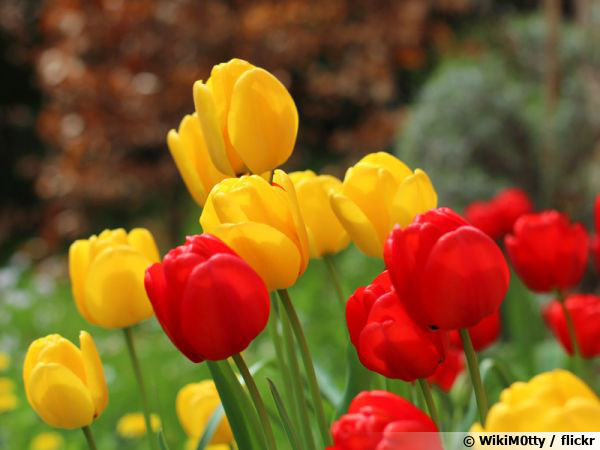

In [82]:
import tensorflow as tf
dataset_url = "https://raw.githubusercontent.com/fabnancyuhp/DEEP-LEARNING/main/DATA/tulipes-600x450.jpg"
data_dir = tf.keras.utils.get_file(origin=dataset_url)
import numpy as np

import PIL.Image
PIL.Image.open(data_dir)

Before to pass the image to the model, we have to preprocess it:
* we convert the picture in a numpy array
* We resize the picture to make it suitable for the model. 
* We reshape the image

Run the cell below to preprocess the image.

In [83]:
import imageio
image_numpy = imageio.imread(data_dir)
image_resized = tf.image.resize(image_numpy, (180, 180)).numpy().astype("uint8") 

image_resized_reshape= image_resized.reshape(1,180,180,3)

Now, you have to apply the model you've just trained on image_resized_reshape and layout the prediction. Sometime the model misclasses the image.

In [89]:
code_to_species = {0:'daisy',1:'dandelion',2:'roses',3:'sunflowers',4:'tulips'}

#your code here
vect_prob = model_flower(image_resized_reshape).numpy()

#print the predicted specie

print("the predicted specie is:  "+str(code_to_species[np.argmax(vect_prob)]))

the predicted specie is:  tulips
